In [1]:
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


open fonksiyonu ile dosya yolumdaki dosya okunur. BUnun için "rb" komutu kullanılır. Bu "read binary" kısaltmasıdır. Daha önce "wb" yani "write binary" olarak kaydetmiştik.

Sonra pickle .load ile pickle dosyasındaki verileri X_test değişkenine atıyoruz.

In [3]:
X_train = pickle.load(open("/content/drive/MyDrive/Deep_Learning_Bootcamp/Project/Data/pickles/X_train.pickle","rb"))
X_val = pickle.load(open("/content/drive/MyDrive/Deep_Learning_Bootcamp/Project/Data/pickles/X_val.pickle","rb"))
X_test = pickle.load(open("/content/drive/MyDrive/Deep_Learning_Bootcamp/Project/Data/pickles/X_test.pickle","rb"))

y_train = pickle.load(open("/content/drive/MyDrive/Deep_Learning_Bootcamp/Project/Data/pickles/y_train.pickle","rb"))
y_val = pickle.load(open("/content/drive/MyDrive/Deep_Learning_Bootcamp/Project/Data/pickles/y_val.pickle","rb"))
y_test = pickle.load(open("/content/drive/MyDrive/Deep_Learning_Bootcamp/Project/Data/pickles/y_test.pickle","rb"))

In [4]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(2000, 128, 128, 1)
(250, 128, 128, 1)
(250, 128, 128, 1)
(2000,)
(250,)
(250,)


Bu aşamadan sonra derin öğrenme modelimizi kuruyoruz:

In [5]:
import tensorflow as tf

In [6]:
model = tf.keras.Sequential()

#### Convolutional katmanı
#### filtre sayısı : 32
#### Filtrelerin boyutları : kernel_size(3,3)
#### Her bir adımda filtreyi aşağı ve yukarı 2 şer adım kaydırsın : strides=(2,2)

1.Katman

In [7]:
X_train[0].shape

(128, 128, 1)

Conv2D katmanını kullanarak öznitelikleri öne çıkaracağız. Alakasız öznitelikleri kaldırılmasını sağlayacak.

In [8]:
model.add(tf.keras.layers.Conv2D(32, kernel_size = (3,3), strides = (2,2), padding = "same", input_shape=(128,128,1)) )

2.Katman

MaxPoolin2D ile biraz gürültüyü azaltacağız.

In [9]:
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)))

Modelimizin bir özetine bakalım:

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


3..6 Katmanlar : 

2 tane daha Conv2D ve Maxpooling2D katmanı daha ekliyoruz.

In [11]:
# Feature Extraction
model.add(tf.keras.layers.Conv2D(32, kernel_size = (3,3), strides = (2,2), padding = "same", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model.add(tf.keras.layers.Conv2D(32, kernel_size = (3,3), strides = (2,2), padding = "same", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 32)         0

7.Katman

Flatten ile 2 boyutlu görselleri 1 boyutlu dizilere aktabilmek için aşağıdaki çalışma yapılır:

In [13]:
# Flatten
model.add(tf.keras.layers.Flatten())

8..15. Katmanlar

Dense : Herbir nodun birbirine bağlı olduğu layerlar.

In [14]:
# Classification 
model.add(tf.keras.layers.Dense(64, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 64, 64, 64)        640       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 2, 2, 64)        

16.Katman : Çıktı Katmanı

Benim çıktı katmanımda 10 tane hücrem olacak.
Softmax = Bir den fazla düğüm varsa onları sınırlandırıyor.

In [15]:
# Output Layer
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

Modelin İnşaası

In [16]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics="accuracy")

In [17]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
63/63 [==============================] - 10s 12ms/step - loss: 1.6543 - accuracy: 0.3535 - val_loss: 1.3195 - val_accuracy: 0.3640
Epoch 2/50
63/63 [==============================] - 0s 7ms/step - loss: 1.2988 - accuracy: 0.3900 - val_loss: 1.1803 - val_accuracy: 0.3640
Epoch 3/50
63/63 [==============================] - 0s 6ms/step - loss: 1.2206 - accuracy: 0.4040 - val_loss: 1.1676 - val_accuracy: 0.4400
Epoch 4/50
63/63 [==============================] - 0s 6ms/step - loss: 1.1468 - accuracy: 0.4380 - val_loss: 1.1653 - val_accuracy: 0.5680
Epoch 5/50
63/63 [==============================] - 0s 6ms/step - loss: 1.0855 - accuracy: 0.5085 - val_loss: 1.0306 - val_accuracy: 0.5520
Epoch 6/50
63/63 [==============================] - 0s 6ms/step - loss: 1.0139 - accuracy: 0.5700 - val_loss: 1.0058 - val_accuracy: 0.5640
Epoch 7/50
63/63 [==============================] - 0s 6ms/step - loss: 0.9580 - accuracy: 0.6130 - val_loss: 0.8665 - val_accuracy: 0.6040
Epoch 8/50
63/63 [

In [18]:
import matplotlib.pyplot as plt

In [19]:
model.metrics_names

['loss', 'accuracy']

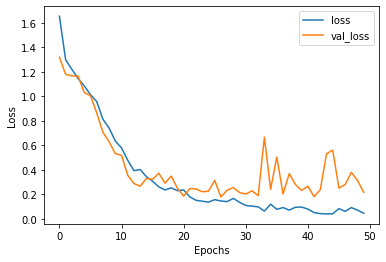

In [20]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()

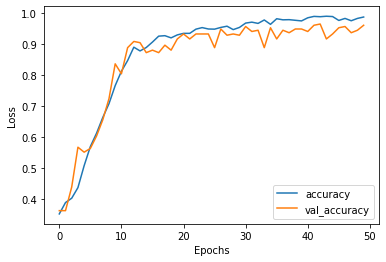

In [21]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()

In [22]:
result = model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 4ms/step - loss: 0.4308 - accuracy: 0.9400


In [23]:
print(f"Loss: {result[0]} | Accuracy: {result[1]}  " )

Loss: 0.4307744801044464 | Accuracy: 0.9399999976158142  
